## 0. Code Library and Links

In [1]:
import numpy as np 
import pandas as pd 
import scipy
import seaborn
import matplotlib.pylab as plt
from matplotlib import cm

%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
from sklearn import preprocessing

## 1. Data Samples

In [4]:
# external
boston = datasets.load_boston()
housing = datasets.fetch_california_housing()
digits = datasets.load_digits()

In [5]:
X1, y1 = boston.data, boston.target
X2, y2 = housing.data, housing.target
X3, y3 = digits.data, digits.target

In [6]:
# artificial
# 5000x3 - matrix, 2 - (responsible for targets) features, 1 - the target, 0.97 - the bias factor)
regression_data = datasets.make_regression(5000, 3, 2, 1, 0.97)
X4, y4 = regression_data[0], regression_data[1]

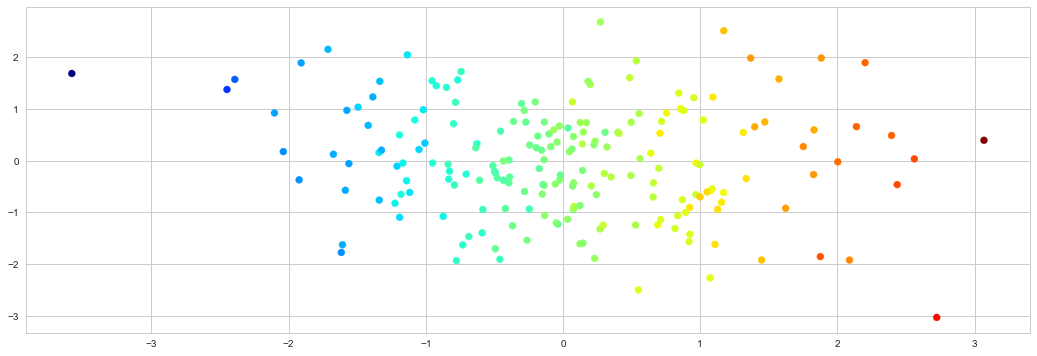

In [7]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18,6))
plt.scatter(X4[:200, 0], X4[:200, 1], c=y4[:200], cmap=cm.jet);

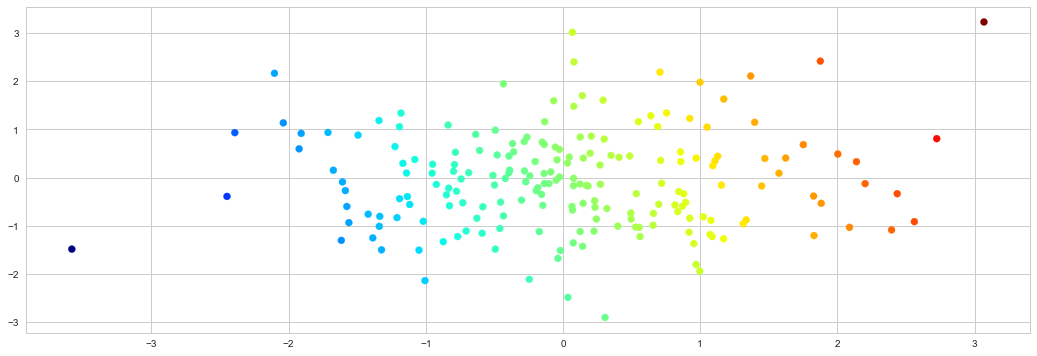

In [8]:
plt.figure(figsize=(18,6))
plt.scatter(X4[:200, 0], X4[:200, 2], c=y4[:200], cmap=cm.jet);

In [9]:
blobs_data = datasets.make_blobs(n_samples=1000, centers=[[1, 1], [-1, -1], [1, -1], [-1, 1]], cluster_std=0.5)
X5, y5 = blobs_data[0], blobs_data[1]

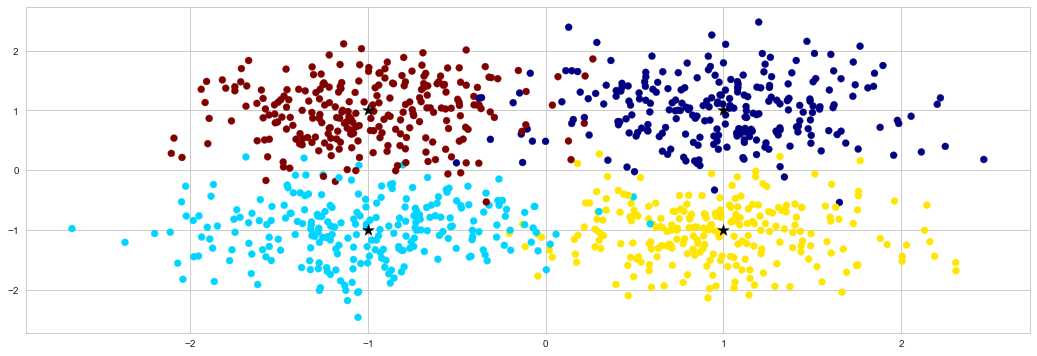

In [10]:
plt.figure(figsize=(18,6))
plt.scatter(X5[:, 0], X5[:, 1], c=y5, cmap=cm.jet)
plt.scatter([1,-1,1,-1], [1,-1,-1,1], c='black', marker='*', s=150);

In [11]:
classification_data = datasets.make_multilabel_classification(n_classes=3, n_samples=1000, n_features=2)
X6, y6 = classification_data[0], classification_data[1]

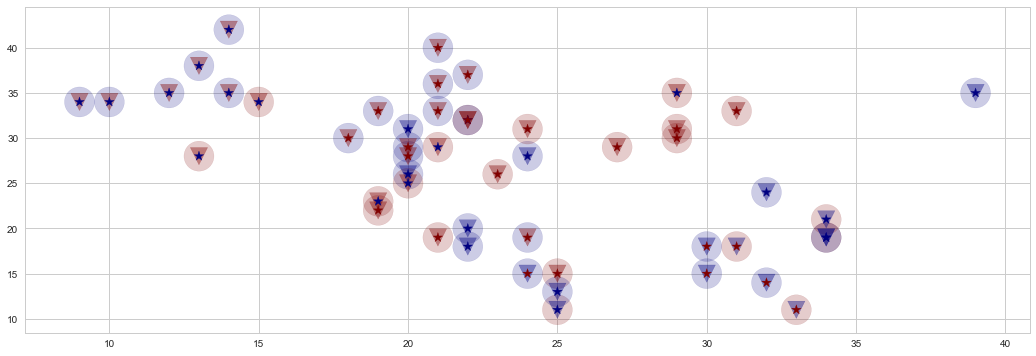

In [12]:
plt.figure(figsize=(18,6))
plt.scatter(X6[:50, 0], X6[:50, 1], c=y6[:50, 0], marker='o', alpha=0.2, cmap=cm.jet, s=900)
plt.scatter(X6[:50, 0], X6[:50, 1], c=y6[:50, 1], marker='v', alpha=0.4, cmap=cm.jet, s=300)
plt.scatter(X6[:50, 0], X6[:50, 1], c=y6[:50, 2], marker='*', cmap=cm.jet, s=100);

## 2. Preprocessing

## 3. Regression

## 4. Classification